#### 타이타닉
    - 1912년 4월 10일 영국의 사우샘프턴을 떠나 미국의 뉴옥으로 향하던 첫 항해 중에 4월 15일 빙산과 충돌하여 침몰
    - 승선인원은 2,223 명 중 1,514명 사망

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.simplefilter("ignore") # 무시할게

sns.set_theme()
sns.set(rc={"figure.figsize":(10,5)})

plt.rcParams["font.family"] = "Apple SD Gothic Neo"
plt.rcParams["axes.unicode_minus"] = False

In [3]:
titanic_df = sns.load_dataset("titanic")

#### 데이터 탐색
    - 데이터 구조

In [4]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- survived : 생존여부(0:사망, 1:생존)
- plcass : 1에 가까울수록 좋은 자리(1)
- sibsp : sibling, spouse(탑승한 형제자매/배우자 수)
- parch : parent, child(탑승항 부모/자녀의 수)
- fare : 요금
- embakred : C(cherbourg), S(southampton), Q(queenstown) 승선지
- who : man, woman, child
- deck : cabin 객실번호

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_df.describe(include=object)

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [9]:
# 누락값을 제외하고 기술통계 요약정보 보기
titanic_df.dropna().describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [7]:
titanic_df.isna().sum() # titanic_df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

- 클래스별로 몇 명의 탑승객이 승선했는가?

In [12]:
# 함수 : count, sum, mean, std...
# titanic_df.groupby("class")["특정컬럼"].함수()

titanic_df.groupby("class").count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491


#### countplot() : 숫자를 세어 차트 작성 - seaborn 에 있는 함수
    - class 별 탑승자, 성별 탑승자, alive 탑승자, alone 탑승자

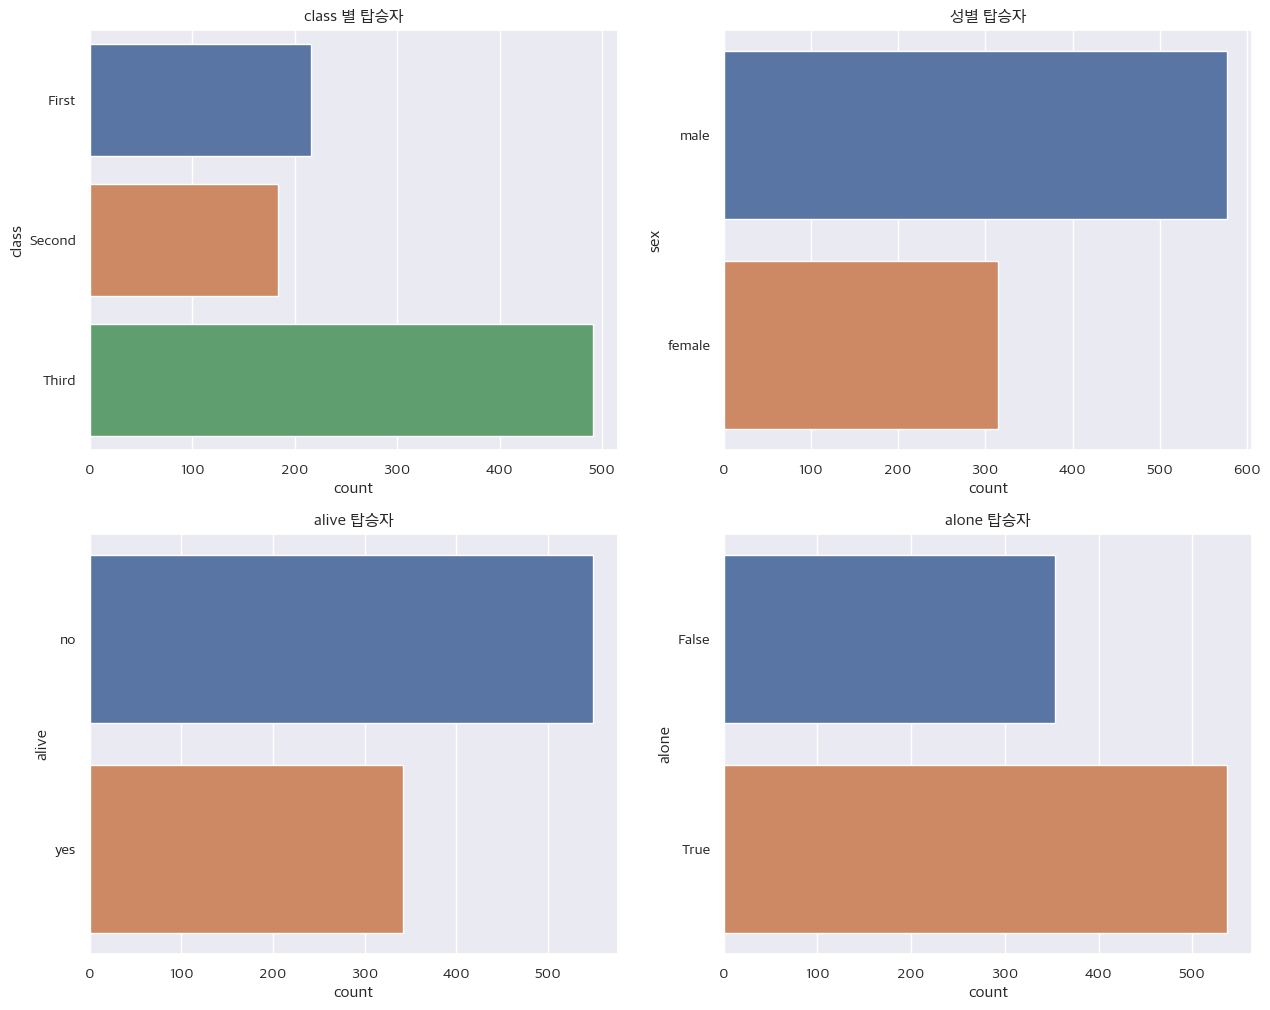

In [13]:
fig, ax=plt.subplots(2,2, figsize=(15,12))
sns.countplot(y="class", data=titanic_df,ax=ax[0,0])
ax[0,0].set_title("class 별 탑승자")

sns.countplot(y="sex", data=titanic_df,ax=ax[0,1])
ax[0,1].set_title("성별 탑승자")

sns.countplot(y="alive", data=titanic_df,ax=ax[1,0])
ax[1,0].set_title("alive 탑승자")

sns.countplot(y="alone", data=titanic_df,ax=ax[1,1])
ax[1,1].set_title("alone 탑승자");

#### 승객들이 클래스별로 지불한 요금의 평균과 중앙값은?

In [16]:
# mean() : 평균값
titanic_df.groupby("class")["fare"].mean()

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

In [17]:
# median(): 중앙값
titanic_df.groupby("class")["fare"].median()

class
First     60.2875
Second    14.2500
Third      8.0500
Name: fare, dtype: float64

#### 생존자 정보 추출

In [24]:
titanic_df[titanic_df["survived"] == 1]


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [27]:
titanic_df[titanic_df["alive"]=="yes"]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [28]:
titanic_df.query("alive == 'yes'")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


#### 생존자 중에서 class 별 count 추출

In [33]:
titanic_df[titanic_df["survived"] == 1].groupby("class").count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,136,136,136,122,136,136,136,134,136,136,117,134,136,136
Second,87,87,87,83,87,87,87,87,87,87,13,87,87,87
Third,119,119,119,85,119,119,119,119,119,119,6,119,119,119


In [34]:
titanic_df.query("alive == 'yes'").groupby("class").count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,136,136,136,122,136,136,136,134,136,136,117,134,136,136
Second,87,87,87,83,87,87,87,87,87,87,13,87,87,87
Third,119,119,119,85,119,119,119,119,119,119,6,119,119,119


In [36]:
# survived, plcass, sex 컬럼만 카운트
titanic_df.query("alive == 'yes'").groupby("class")[["survived","pclass","sex"]].count()

,survived,pclass,sex
class,,,
First,136,136,136
Second,87,87,87
Third,119,119,119


#### class 별 age 컬럼에 대한 기술통계요약 정보

In [37]:
titanic_df.groupby("class")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
First,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
Second,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
Third,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [38]:
# 최소, 중앙, 최대 만 보기
# agg() or aggregate()

titanic_df.groupby("class")["age"].agg(["min","median","max"])

,min,median,max
class,,,
First,0.92,37.0,80.0
Second,0.67,29.0,70.0
Third,0.42,24.0,74.0


In [47]:
# 나이가 30세 초과인 승객에 대해서 class별 중앙값
titanic_df[titanic_df["age"] > 30].groupby("class").median(numeric_only=True) # numeric_only=False 수치형데이터만 해줘
# titanic_df.query("age > 30").groupby("class").median(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,1.0,1.0,45.0,0.0,0.0,56.9292,1.0,0.0
Second,0.0,2.0,39.0,0.0,0.0,14.0000,1.0,1.0
Third,0.0,3.0,38.0,0.0,0.0,8.0500,1.0,1.0


In [48]:
# class, sex 나이의 중앙값

titanic_df.groupby(['class','sex'])['age'].median() # 시리즈 구조

class   sex   
First   female    35.0
        male      40.0
Second  female    28.0
        male      30.0
Third   female    21.5
        male      25.0
Name: age, dtype: float64

In [49]:
# 마지막 index를 column으로 변경 : unstack()
titanic_df.groupby(['class','sex'])['age'].median().unstack()   # 데이터프레임 구조

sex,female,male
class,,
First,35.0,40.0
Second,28.0,30.0
Third,21.5,25.0


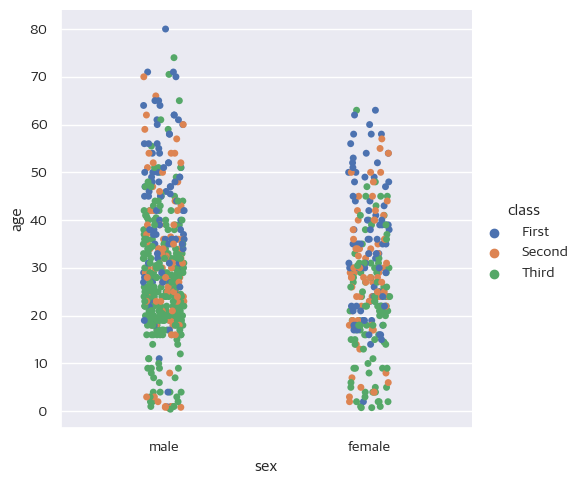

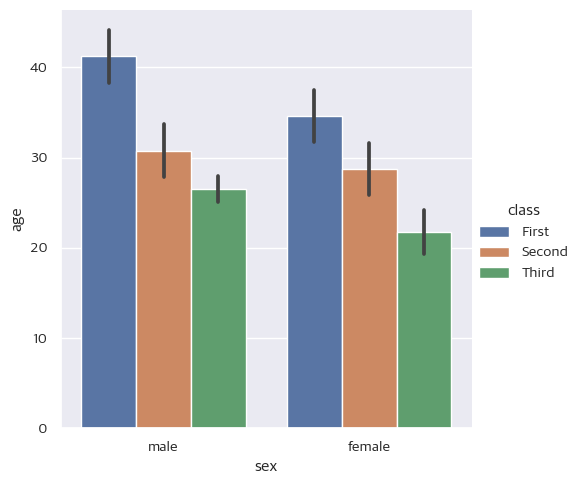

In [54]:
# 성별 나이대 분포도
sns.catplot(x="sex",y="age", data=titanic_df, hue="class");

sns.catplot(x="sex",y="age", data=titanic_df, hue="class",kind="bar");

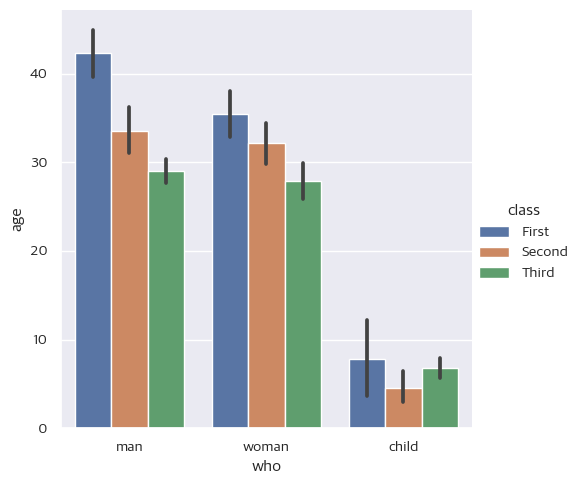

In [55]:
sns.catplot(x="who",y="age", data=titanic_df, hue="class",kind="bar");

In [57]:
# class, who 별 요금의 중앙값

titanic_df.groupby(['class','who'])['fare'].mean().unstack()

who,child,man,woman
class,,,
First,139.382633,65.951086,104.317995
Second,28.323905,19.054124,20.868624
Third,23.220190,11.340213,15.354351


In [58]:
titanic_df.groupby(['class','sex'])['survived'].mean().unstack()

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


In [59]:
# mean() 함수가 적용된 상태임

titanic_df.pivot_table('survived',index='class',columns='who')

who,child,man,woman
class,,,
First,0.833333,0.352941,0.978022
Second,1.000000,0.080808,0.909091
Third,0.431034,0.119122,0.491228


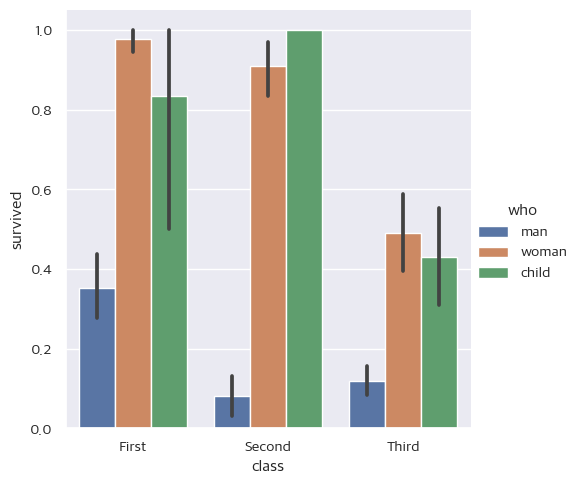

In [65]:
sns.catplot(x="class", y="survived", data=titanic_df, hue="who", kind="bar");

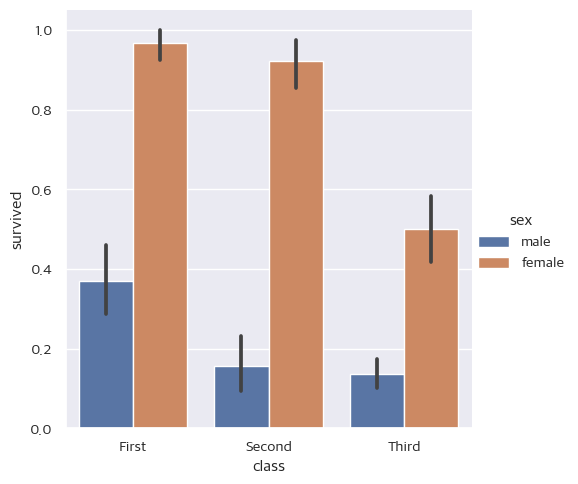

In [62]:
sns.catplot(x="class", y="survived", data=titanic_df, hue="sex", kind="bar");

In [68]:
pd.pivot_table?

Signature:
pd.pivot_table(
    data: 'DataFrame',
    values=None,
    index=None,
    columns=None,
    aggfunc: 'AggFuncType' = 'mean',
    fill_value=None,
    margins: 'bool' = False,
    dropna: 'bool' = True,
    margins_name: 'Hashable' = 'All',
    observed: 'bool' = False,
    sort: 'bool' = True,
) -> 'DataFrame'
Docstring:
Create a spreadsheet-style pivot table as a DataFrame.

The levels in the pivot table will be stored in MultiIndex objects
(hierarchical indexes) on the index and columns of the result DataFrame.

Parameters
----------
data : DataFrame
values : list-like or scalar, optional
    Column or columns to aggregate.
index : column, Grouper, array, or list of the previous
    If an array is passed, it must be the same length as the data. The
    list can contain any of the other types (except list).
    Keys to group by on the pivot table index.  If an array is passed,
    it is being used as the same manner as column values.
columns : column, Grouper, array, or l

In [67]:
# 성별로 구분, 특정 나이대 class 별 생존자 

# 나이대 그룹 생성
age = pd.cut(titanic_df['age'],[0,18,40,80])    # 임의로 나이 그룹을 만들수있음

titanic_df.pivot_table('survived',['sex',age],"class")  # sex 컬럼 , age 변수

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 40]  0.979167  0.914894  0.480000
       (40, 80]  0.961538  0.846154  0.111111
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 40]  0.478261  0.063492  0.146199
       (40, 80]  0.280000  0.095238  0.064516

In [69]:
# 생존자를 대상으로 who, class

titanic_df.pivot_table('survived','who','class',margins=True)

class,First,Second,Third,All
who,,,,
child,0.833333,1.000000,0.431034,0.590361
man,0.352941,0.080808,0.119122,0.163873
woman,0.978022,0.909091,0.491228,0.756458
All,0.629630,0.472826,0.242363,0.383838


#### 생존자 중 class 별 deck 추출


In [70]:
titanic_df.pivot_table('survived','deck','class')

class,First,Second,Third
deck,,,
A,0.466667,NaN,NaN
B,0.744681,NaN,NaN
C,0.593220,NaN,NaN
D,0.758621,0.750,NaN
E,0.720000,0.750,1.0
F,NaN,0.875,0.2
G,NaN,NaN,0.5


#### 승선지점

In [71]:
titanic_df.pivot_table('survived','embark_town','class')

class,First,Second,Third
embark_town,,,
Cherbourg,0.694118,0.529412,0.378788
Queenstown,0.500000,0.666667,0.375000
Southampton,0.582677,0.463415,0.189802


<Axes: xlabel='count', ylabel='embark_town'>

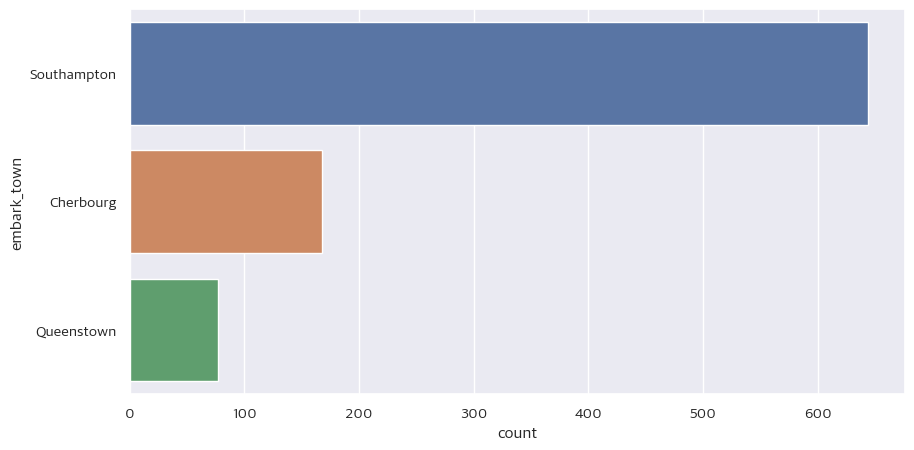

In [72]:
sns.countplot(y="embark_town",data=titanic_df)

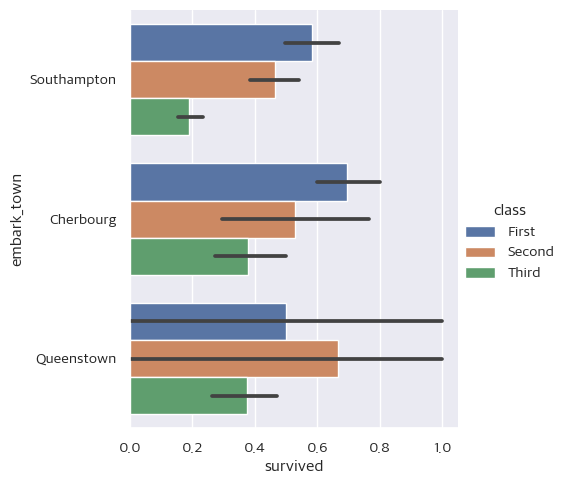

In [76]:
# 생존자 중 탑승위치

sns.catplot(x='survived',y='embark_town',kind="bar",hue='class',data=titanic_df);

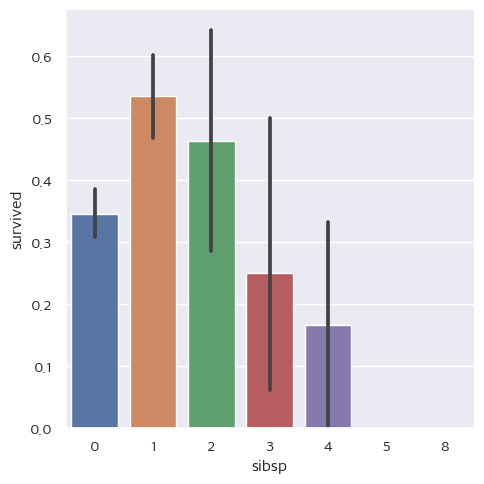

In [78]:
# 형제/자매, 배우자의 수에 따라 생존율 시각화

sns.catplot(x="sibsp",y="survived",kind="bar",data=titanic_df);

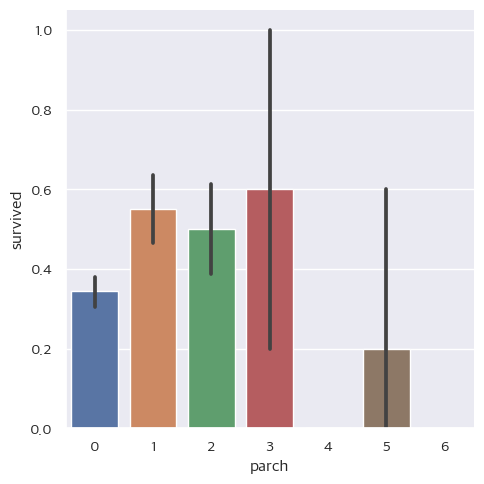

In [79]:
# 부모/자식

sns.catplot(x="parch",y="survived",kind="bar",data=titanic_df);

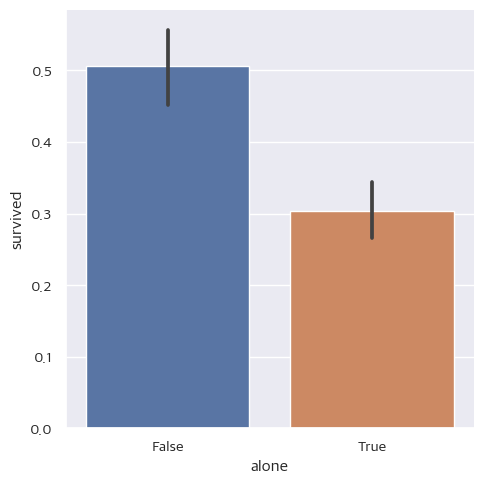

In [81]:
sns.catplot(x="alone",y="survived",kind="bar",data=titanic_df);